In [2]:
import numpy as np
import pandas as pd

In [3]:
cr=pd.read_csv(r'C:\Users\DELL\CreditRisk.csv')


In [4]:
cr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


In [5]:
cr.shape

(981, 13)

In [6]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [7]:
cr.isnull().sum()[cr.isnull().sum()>0]

Gender              24
Married              3
Dependents          25
Self_Employed       55
LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

In [8]:
cr.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [9]:
cr.Gender = cr.Gender.fillna('Male')

In [10]:
cr.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [11]:
cr.Married = cr.Married.fillna('Yes')

In [12]:
cr.Dependents.value_counts()

0.0    545
1.0    160
2.0    160
4.0     90
3.0      1
Name: Dependents, dtype: int64

In [13]:
cr.Dependents=cr.Dependents.fillna(0)

In [14]:
cr.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [15]:
cr.Self_Employed = cr.Self_Employed.fillna('Yes')

In [16]:
cr.LoanAmount.value_counts()

120.0    29
110.0    27
100.0    24
187.0    21
150.0    19
         ..
218.0     1
62.0      1
53.0      1
242.0     1
197.0     1
Name: LoanAmount, Length: 232, dtype: int64

In [17]:
cr.LoanAmount=cr.LoanAmount.fillna(cr.LoanAmount.mean())

In [18]:
cr.Loan_Amount_Term.value_counts()
cr.Loan_Amount_Term=cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())

In [19]:
cr.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [20]:
cr.Credit_History=cr.Credit_History.fillna(0)

In [21]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
cr[cr.select_dtypes(include=['object']).columns] = cr[cr.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [24]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    int32  
 1   Gender             981 non-null    int32  
 2   Married            981 non-null    int32  
 3   Dependents         981 non-null    float64
 4   Education          981 non-null    int32  
 5   Self_Employed      981 non-null    int32  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    int32  
 12  Loan_Status        981 non-null    int32  
dtypes: float64(5), int32(7), int64(1)
memory usage: 72.9 KB


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
cr_train, cr_test = train_test_split(cr,test_size=.2)

In [27]:
cr_train_x=cr_train.iloc[: ,0:-1]

In [28]:
cr_train_y=cr_train.iloc[: , -1]

In [29]:
cr_train_y

435    1
108    0
415    1
929    1
682    1
      ..
144    1
59     1
696    0
606    1
355    1
Name: Loan_Status, Length: 784, dtype: int32

In [30]:
cr_test_x=cr_test.iloc[: ,0:-1]
cr_test_y=cr_test.iloc[: , -1]

In [31]:
cr_test_x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
833,593,1,1,1.0,0,0,3747,2139.0,125.0,360.0,1.0,2
730,292,0,0,0.0,1,0,0,1760.0,180.0,360.0,1.0,1
904,788,1,1,0.0,0,0,3667,2000.0,170.0,360.0,1.0,1
597,954,1,0,0.0,0,0,2987,0.0,88.0,360.0,0.0,1
676,161,0,0,2.0,0,0,4968,0.0,189.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
935,874,0,1,0.0,1,0,1647,1762.0,181.0,360.0,1.0,2
411,647,1,1,0.0,0,1,6256,0.0,160.0,360.0,0.0,2
226,363,1,1,0.0,1,1,4735,0.0,138.0,360.0,1.0,2
638,73,1,1,0.0,0,0,5400,4380.0,290.0,360.0,1.0,2


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logi_cr=LogisticRegression()

In [34]:
logi_cr.fit(cr_train_x,cr_train_y)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
pred=logi_cr.predict(cr_test_x)
pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cr_tab=confusion_matrix(cr_test_y,pred)

In [38]:
cr_tab

array([[ 32,  25],
       [ 17, 123]], dtype=int64)

In [39]:
#accuracy
cr_tab.diagonal().sum()*100/cr_tab.sum()

78.68020304568527

In [40]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(cr_test_y,pred)*100


78.68020304568529

In [44]:
#recall or tpr
from sklearn.metrics import recall_score

In [45]:
recall_score(cr_test_y,pred)*100

87.85714285714286

In [46]:
#precision
#tp/tp+fp

In [47]:
from sklearn.metrics import precision_score

In [48]:
precision_score(cr_test_y,pred)*100

83.1081081081081

In [49]:
#f1ratio

In [50]:
from sklearn.metrics import f1_score

In [51]:
f1_score(cr_test_y,pred)*100

85.41666666666666

In [52]:
#auroc curve

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [54]:
#convert pred value in probability

In [55]:
pred_proba=logi_cr.predict_proba(cr_test_x)
pred_proba

array([[0.08804892, 0.91195108],
       [0.29067061, 0.70932939],
       [0.12133629, 0.87866371],
       [0.59761603, 0.40238397],
       [0.25054734, 0.74945266],
       [0.09571432, 0.90428568],
       [0.24228175, 0.75771825],
       [0.1241409 , 0.8758591 ],
       [0.12609739, 0.87390261],
       [0.17565501, 0.82434499],
       [0.05466421, 0.94533579],
       [0.25525025, 0.74474975],
       [0.28287819, 0.71712181],
       [0.12538701, 0.87461299],
       [0.22201231, 0.77798769],
       [0.10887775, 0.89112225],
       [0.14757055, 0.85242945],
       [0.24962857, 0.75037143],
       [0.24036015, 0.75963985],
       [0.09521775, 0.90478225],
       [0.13768148, 0.86231852],
       [0.66408434, 0.33591566],
       [0.70768323, 0.29231677],
       [0.78061534, 0.21938466],
       [0.39677272, 0.60322728],
       [0.13087752, 0.86912248],
       [0.59729838, 0.40270162],
       [0.18623958, 0.81376042],
       [0.05005491, 0.94994509],
       [0.17537083, 0.82462917],
       [0.

In [56]:
pred_q=logi_cr.predict(cr_test_x)
pred_q

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [57]:
roc_auc_score(cr_test_y,pred_q)

0.7199874686716792

In [58]:
pred_proba[:,1]

array([0.91195108, 0.70932939, 0.87866371, 0.40238397, 0.74945266,
       0.90428568, 0.75771825, 0.8758591 , 0.87390261, 0.82434499,
       0.94533579, 0.74474975, 0.71712181, 0.87461299, 0.77798769,
       0.89112225, 0.85242945, 0.75037143, 0.75963985, 0.90478225,
       0.86231852, 0.33591566, 0.29231677, 0.21938466, 0.60322728,
       0.86912248, 0.40270162, 0.81376042, 0.94994509, 0.82462917,
       0.92548804, 0.4523817 , 0.87195891, 0.76472785, 0.321169  ,
       0.46126319, 0.91430114, 0.81694984, 0.45969403, 0.73036638,
       0.90478312, 0.79489847, 0.41734128, 0.90843289, 0.83230414,
       0.82068389, 0.84292503, 0.8987163 , 0.85141104, 0.89624066,
       0.84057819, 0.54737613, 0.74806791, 0.84902212, 0.78008862,
       0.25229175, 0.89723095, 0.87584972, 0.36435705, 0.87348559,
       0.81591572, 0.6919434 , 0.92313594, 0.91065355, 0.28646883,
       0.31006859, 0.80150234, 0.75957231, 0.80918098, 0.83943531,
       0.90722491, 0.87667389, 0.88910765, 0.86966958, 0.90189

In [59]:
fpr,tpr,ther=roc_curve(cr_test_y,pred_proba[:,1])

In [60]:
import matplotlib.pyplot as plt

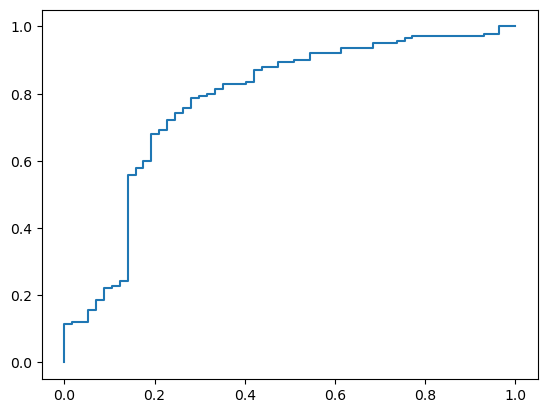

In [61]:
plt.plot(fpr,tpr)

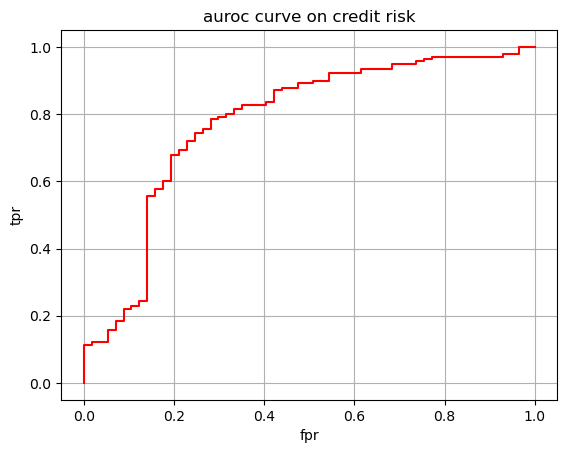

In [62]:
plt.plot(fpr,tpr,color='r')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('auroc curve on credit risk')
plt.grid()
